In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.utils.fixes import loguniform
from scipy.stats import randint, uniform
from sklearn.model_selection import RandomizedSearchCV

from sklearn.model_selection import train_test_split
from sklearn.ensemble import (GradientBoostingClassifier,
                               RandomForestClassifier,StackingClassifier)
import xgboost as xgb
from sklearn.metrics import classification_report, confusion_matrix


In [ ]:
df_transformed = pd.read_csv("data/preprocessed.csv")

# supervised learning algorithm to learn the anomalies

#### Resampling the data: since data is more skewed towards one class

In [ ]:
count_class_0, count_class_1 = df_transformed.anomaly.value_counts()
df_class_0 = df_transformed[df_transformed['anomaly'] == 0]
df_class_1 = df_transformed[df_transformed['anomaly'] == 1]

Random under-sampling:
0    58013
1    58013
Name: anomaly, dtype: int64


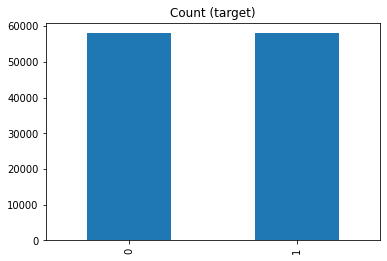

In [ ]:
df_class_0_under = df_class_0.sample(count_class_1)
df_test_under = pd.concat([df_class_0_under, df_class_1], axis=0)

print('Random under-sampling:')
print(df_test_under.anomaly.value_counts())

df_test_under.anomaly.value_counts().plot(kind='bar', title='Count (target)');

#### Hyper parameter tuning

In [ ]:
X = df_test_under['temperature'].values.reshape(-1,1)
y= df_test_under['anomaly']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [ ]:

def test_classifier(clf, params, n_iter=5):
  grid = RandomizedSearchCV(clf, params, 
                            scoring='f1', cv=3, 
                            verbose=3, n_iter=n_iter)
  grid.fit(X_train, y_train)
  grid.best_estimator_.fit(X_train, y_train)
  return grid.best_estimator_, grid.best_score_

In [ ]:
classifiers =  {}

##### XGBoost

In [ ]:
params = {
          'learning_rate': loguniform(1e-2, 0.2),
          'n_estimators': randint(50,500),
          'max_depth': randint(2, 10)
}
xgclf = xgb.XGBClassifier()
classifiers['xgboost'] = test_classifier(xgclf, params)
classifiers['xgboost']

Fitting 3 folds for each of 5 candidates, totalling 15 fits
[CV 1/3] END learning_rate=0.03331070383276103, max_depth=2, n_estimators=495;, score=1.000 total time=   5.4s
[CV 2/3] END learning_rate=0.03331070383276103, max_depth=2, n_estimators=495;, score=1.000 total time=   5.2s
[CV 3/3] END learning_rate=0.03331070383276103, max_depth=2, n_estimators=495;, score=1.000 total time=   5.2s
[CV 1/3] END learning_rate=0.03516626775165747, max_depth=5, n_estimators=331;, score=1.000 total time=   3.7s
[CV 2/3] END learning_rate=0.03516626775165747, max_depth=5, n_estimators=331;, score=1.000 total time=   3.7s
[CV 3/3] END learning_rate=0.03516626775165747, max_depth=5, n_estimators=331;, score=1.000 total time=   3.7s
[CV 1/3] END learning_rate=0.01980944291479138, max_depth=5, n_estimators=233;, score=1.000 total time=   2.6s
[CV 2/3] END learning_rate=0.01980944291479138, max_depth=5, n_estimators=233;, score=1.000 total time=   2.7s
[CV 3/3] END learning_rate=0.01980944291479138, max_

(XGBClassifier(learning_rate=0.03331070383276103, max_depth=2, n_estimators=495),
 1.0)

##### Randomforest

In [ ]:

rfc = RandomForestClassifier()
params = {'max_features': uniform(),
          'max_depth': randint(1, 20),
          'min_samples_leaf': randint(1, 20)}
classifiers['rfc'] = test_classifier(rfc, params)
classifiers['rfc']

Fitting 3 folds for each of 5 candidates, totalling 15 fits
[CV 1/3] END max_depth=9, max_features=0.2758360253814487, min_samples_leaf=15;, score=1.000 total time=   1.4s
[CV 2/3] END max_depth=9, max_features=0.2758360253814487, min_samples_leaf=15;, score=1.000 total time=   1.4s
[CV 3/3] END max_depth=9, max_features=0.2758360253814487, min_samples_leaf=15;, score=1.000 total time=   1.4s
[CV 1/3] END max_depth=11, max_features=0.20912499453389588, min_samples_leaf=1;, score=1.000 total time=   1.4s
[CV 2/3] END max_depth=11, max_features=0.20912499453389588, min_samples_leaf=1;, score=1.000 total time=   1.4s
[CV 3/3] END max_depth=11, max_features=0.20912499453389588, min_samples_leaf=1;, score=1.000 total time=   1.4s
[CV 1/3] END max_depth=2, max_features=0.8855096974288762, min_samples_leaf=6;, score=1.000 total time=   1.4s
[CV 2/3] END max_depth=2, max_features=0.8855096974288762, min_samples_leaf=6;, score=1.000 total time=   1.4s
[CV 3/3] END max_depth=2, max_features=0.88

(RandomForestClassifier(max_depth=9, max_features=0.2758360253814487,
                        min_samples_leaf=15), 1.0)

##### Gradient Boosting

In [ ]:
params = {
          'n_estimators': randint(50,500),
          'max_depth': randint(2, 10),
          'max_features': ['auto', 'sqrt', 'log2']
}
grdclf = GradientBoostingClassifier()
classifiers['grd'] = test_classifier(grdclf, params)
classifiers['grd']

Fitting 3 folds for each of 5 candidates, totalling 15 fits
[CV 1/3] END max_depth=9, max_features=sqrt, n_estimators=254;, score=1.000 total time=   5.1s
[CV 2/3] END max_depth=9, max_features=sqrt, n_estimators=254;, score=1.000 total time=   4.3s
[CV 3/3] END max_depth=9, max_features=sqrt, n_estimators=254;, score=1.000 total time=   3.6s
[CV 1/3] END max_depth=4, max_features=sqrt, n_estimators=93;, score=1.000 total time=   1.7s
[CV 2/3] END max_depth=4, max_features=sqrt, n_estimators=93;, score=1.000 total time=   1.7s
[CV 3/3] END max_depth=4, max_features=sqrt, n_estimators=93;, score=1.000 total time=   1.7s
[CV 1/3] END max_depth=3, max_features=sqrt, n_estimators=239;, score=1.000 total time=   3.5s
[CV 2/3] END max_depth=3, max_features=sqrt, n_estimators=239;, score=1.000 total time=   3.4s
[CV 3/3] END max_depth=3, max_features=sqrt, n_estimators=239;, score=1.000 total time=   3.4s
[CV 1/3] END max_depth=2, max_features=auto, n_estimators=209;, score=1.000 total time= 

(GradientBoostingClassifier(max_depth=9, max_features='sqrt', n_estimators=254),
 1.0)

#### Model creation and evaluation

GRADIENT BOSSTING

In [ ]:
clf_grd = GradientBoostingClassifier(n_estimators=284, random_state=0, 
                                     max_depth=7,
                                     max_features='sqrt')
clf_grd.fit(X_train, y_train)
y_pred_grd = clf_grd.predict(X_test)

In [ ]:
print(confusion_matrix(y_test, y_pred_grd))

[[14490     0]
 [    0 14517]]


In [ ]:
print(classification_report(y_test, y_pred_grd))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     14490
           1       1.00      1.00      1.00     14517

    accuracy                           1.00     29007
   macro avg       1.00      1.00      1.00     29007
weighted avg       1.00      1.00      1.00     29007



XGBOOST

In [ ]:

clf_xgb = xgb.XGBClassifier(learning_rate=0.020987123462013087, max_depth=5, n_estimators=182)

clf_xgb.fit(X_train, y_train)
y_pred_xgb = clf_xgb.predict(X_test)


In [ ]:
print(classification_report(y_test, y_pred_xgb))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     14490
           1       1.00      1.00      1.00     14517

    accuracy                           1.00     29007
   macro avg       1.00      1.00      1.00     29007
weighted avg       1.00      1.00      1.00     29007



RANDOM FOREST

In [ ]:

clf_rfc = RandomForestClassifier(max_depth=9, max_features=0.7301066073468825,
                        min_samples_leaf=6)

clf_rfc.fit(X_train, y_train)
y_pred_rfc = clf_xgb.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred_rfc))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     14490
           1       1.00      1.00      1.00     14517

    accuracy                           1.00     29007
   macro avg       1.00      1.00      1.00     29007
weighted avg       1.00      1.00      1.00     29007



Creating a stacking classifier to make a best fitting model

In [ ]:
clfs = [
        ('grd', clf_grd),
        ('xgb', clf_xgb),
        ('rfc', clf_rfc)
        ]

In [ ]:
from sklearn.linear_model import LogisticRegression
clf_stk = StackingClassifier(estimators = clfs,final_estimator = LogisticRegression(),cv=5)
clf_stk.fit(X_train, y_train)
y_pred = clf_stk.predict(X_test)


In [ ]:
print(confusion_matrix(y_test, y_pred))

[[14490     0]
 [    0 14517]]


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     14490
           1       1.00      1.00      1.00     14517

    accuracy                           1.00     29007
   macro avg       1.00      1.00      1.00     29007
weighted avg       1.00      1.00      1.00     29007



FOr the given resampled data , stackingclassifier shows the best F1 score of 1 for the testing data